<a href="https://colab.research.google.com/github/nilesh2gupta/UBC_project/blob/main/Bert_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer


In [ ]:
bert_model = TFAutoModel.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
import tensorflow as tf
from transformers import TFRobertaModel, RobertaTokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
RoBERTa_model = TFRobertaModel.from_pretrained('roberta-base')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['roberta.embeddings.position_ids', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [ ]:
def get_bert_input(text):
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors='tf')
    return inputs

def get_bert_last_hidden_state_output(inputs,model):
    output = model(inputs)
    return output.last_hidden_state.numpy()

def get_bert_pooler_output(inputs,model):
    output=model(inputs)
    return output.pooler_output.numpy()

def convert_to_bert_last_hidden_state_output(text,model):
    inputs =get_bert_input(text)
    output = get_bert_last_hidden_state_output(inputs,model)
    return output

def convert_to_bert_pooler_output(text,model):
    inputs =get_bert_input(text)
    output = get_bert_pooler_output(inputs,model)
    return  output

def model_prediction_input(text,max_squence_length,bert_model):
    inputs = tokenizer(text, padding=True, truncation=True,max_length=max_squence_length, return_tensors='tf')
    padded_input = tokenizer.pad(inputs, max_length=max_squence_length, padding='max_length', return_tensors='tf')
    output=bert_model(padded_input)
    return output.last_hidden_state.numpy()


In [ ]:
import pandas as pd
import numpy as np
df_new=pd.read_csv('/content/drive/MyDrive/UBC_project/cleaned_data.csv',encoding='UTF-8')

In [ ]:
import re

special_symbols = ['â€˜', 'â€ ™', '€ ™', '€ ¦', '€','â€ "','â€"']

def remove_special_symbol(text):

    pattern = '|'.join(map(re.escape, special_symbols))
    cleaned_text = re.sub(pattern, '', text)

    return cleaned_text

In [ ]:
df_new['claims']=df_new['claims'].apply(lambda x:remove_special_symbol(x))
df_new

,claims,claims_labels
0,global warming drive polar bear toward extinction,SUPPORTS
1,the sun go lockdown could cause freeze weather...,SUPPORTS
2,the polar bear population grow,REFUTES
3,ironic study find CO2 slightly cool planet,REFUTES
4,human addition CO2 margin error current measur...,REFUTES
...,...,...
10025,these conservative estimate wait see actual ou...,REFUTES
10026,so of follow suit,SUPPORTS
10027,in past month 1200 people die amid flood Bangl...,SUPPORTS
10028,some Grumpy s sweet generate national coverage...,SUPPORTS


In [ ]:
df_new = df_new[(df_new['claims'].str.split().str.len() > 3) & (df_new['claims'].str.split().str.len() < 20)]
df_new.shape

(7330, 2)

<Axes: xlabel='claims_labels'>

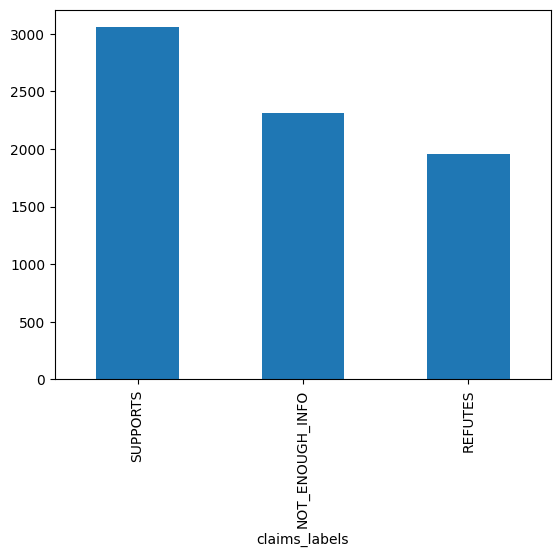

In [ ]:
df_new['claims_labels'].value_counts().plot(kind='bar')

Balanced Class Distribution:
claims_labels
SUPPORTS           1960
NOT_ENOUGH_INFO    1960
REFUTES            1960
Name: count, dtype: int64


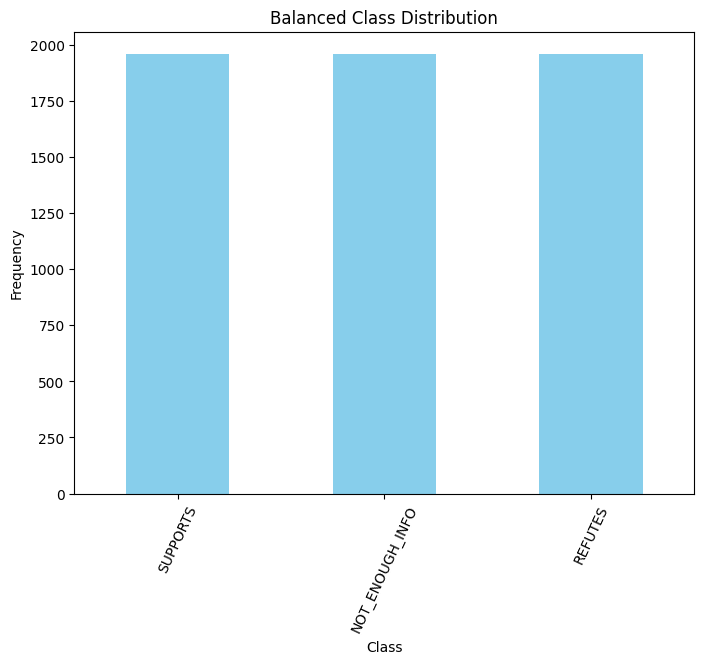

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
min_class_size = min(df_new['claims_labels'].value_counts())

balanced_train_data = pd.DataFrame(columns=['claims','claims_labels'])

class_distribution = df_new['claims_labels'].value_counts()

for genre, count in class_distribution.items():
  class_data = df_new[df_new['claims_labels'] == genre].sample(n=min_class_size, random_state=22)
  balanced_train_data = pd.concat([balanced_train_data, class_data], ignore_index=True)

balanced_train_data.describe()
balanced_class_distribution = balanced_train_data['claims_labels'].value_counts()

print("Balanced Class Distribution:")
print(balanced_class_distribution)

plt.figure(figsize=(8, 6))
balanced_class_distribution.plot(kind='bar', color='skyblue')
plt.title('Balanced Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=65)
plt.show()


In [ ]:
df_new=balanced_train_data

In [ ]:
def ohe(text):

    if text=='SUPPORTS':
         return 2
    elif text=='NOT_ENOUGH_INFO':
         return 1
    elif text=='REFUTES' :
          return 0
    return 0

df_new['claims_labels']=df_new['claims_labels'].apply(lambda x:ohe(x))

df_new=df_new.sample(n=700,random_state=22)
df_new.shape

(700, 2)

<Axes: xlabel='claims_labels'>

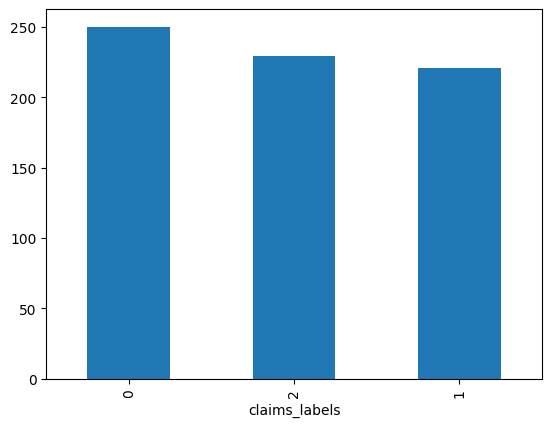

In [ ]:
df_new['claims_labels'].value_counts().plot(kind='bar')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df_new['claims'],df_new['claims_labels'],test_size=0.001,random_state=2)

In [ ]:
x_train = []

def create_list(text):
    x_train.append(text)

X_train.apply(lambda x: create_list(x))

print(x_train)

['currently half carbon dioxide release burn fossil fuel remain atmosphere absorb vegetation ocean', 'an internal meme obtain the Washington Most offer glimpse challenge face Plump administration issue climate change', 'as part collaboration project Professor Byron Adams Brigham Young University colleague Diana All Colorado State University', 'on october 24 2005 Hurricane Ilya strike Soldier County category hurricane', 'the carbon dioxide level necessary thaw Earth estimate 350 time today 13 atmosphere', 'the Soto second commitment period apply 11 annual global emission greenhouse gas', 'scientist reach 100 Consensus Anthropogenic Global Farming', 'Australia account 15 per cent global carbon emission', 'a ship name russian explorer Guard Toll first tackle treacherous Northern Tea Route without help icebreaker', 'these largescale alteration physical environment drive change level Antarctic marine food web', 'today development Governor Domo certain infuriated President', 'by August 2014 

In [ ]:
x_train = convert_to_bert_last_hidden_state_output(x_train,RoBERTa_model)
print(x_train.shape)
max_squence_length = x_train.shape[1]
embedding_dim = x_train.shape[2]

(699, 46, 768)


In [ ]:
'''import time
start = time.time()
output = model(inputs)
end = time.time()
print(f"Time taken for one output: {end - start:.2f} seconds")'''


Time taken for one output: 0.19 seconds


In [ ]:
#print(f"{((end - start)*10000)/3600:.2f} hours")

0.52 hours


Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 claims_input (InputLayer)   [(None, 46, 768)]            0         []                            
                                                                                                  
 Conv1D_layer (Conv1D)       (None, 42, 256)              983296    ['claims_input[0][0]']        
                                                                                                  
 MaxPooling_layer (MaxPooli  (None, 21, 256)              0         ['Conv1D_layer[0][0]']        
 ng1D)                                                                                            
                                                                                                  
 bidirectional_10 (Bidirect  (None, 21, 200)              285600    ['MaxPooling_layer[0][0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - ETA: 0s - loss: 1.1047 - accuracy: 0.3789
Epoch 2: val_accuracy improved from 0.32143 to 0.41667, saving model to /content/drive/MyDrive/UBC_project/RoBERTa_model.h5
7/7 [==============================] - 1s 95ms/step - loss: 1.1047 - accuracy: 0.3789 - val_loss: 1.0718 - val_accuracy: 0.4167
Epoch 3/30
7/7 [==============================] - ETA: 0s - loss: 1.0761 - accuracy: 0.3935
Epoch 3: val_accuracy did not improve from 0.41667
7/7 [==============================] - 1s 83ms/step - loss: 1.0761 - accuracy: 0.3935 - val_loss: 1.0496 - val_accuracy: 0.3333
Epoch 4/30
7/7 [==============================] - ETA: 0s - loss: 1.0485 - accuracy: 0.4634
Epoch 4: val_accuracy did not improve from 0.41667
7/7 [==============================] - 1s 83ms/step - loss: 1.0485 - accuracy: 0.4634 - val_loss: 1.0492 - val_accuracy: 0.3929
Epoch 5/30
7/7 [==============================] - ETA: 0s - loss: 1.0248 - accuracy: 0.4911
Epoch 5: val_accuracy did not imp

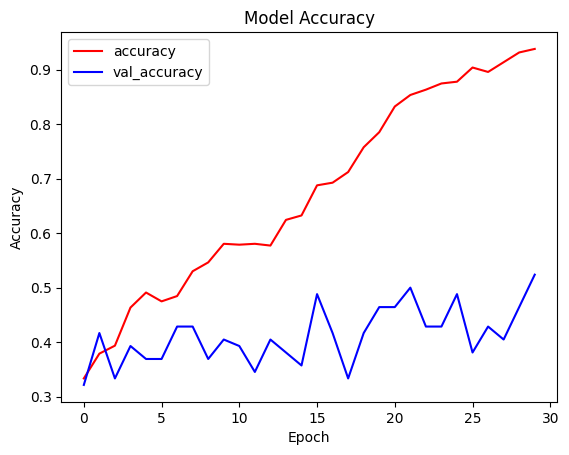

In [ ]:
from keras.layers import Input,Flatten, Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, BatchNormalization, GlobalMaxPooling1D, Attention
from keras.models import Model
from keras.optimizers import Nadam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf

# BERT output is feeded as input
input_layer = Input(shape=(max_squence_length,embedding_dim,), name='claims_input')

# Convolutional layer
conv_layer = Conv1D(filters=256, kernel_size=5, activation='relu', name='Conv1D_layer')(input_layer)
pooling_layer = MaxPooling1D(pool_size=2, name='MaxPooling_layer')(conv_layer)

# Bidirectional LSTM layer
bilstm_layer = Bidirectional(LSTM(100, return_sequences=True, name='BiLSTM_layer'))(pooling_layer)

# Attention mechanism
attention = Attention(name='Attention_layer')([bilstm_layer, bilstm_layer])
attention_pooling = GlobalMaxPooling1D(name='Attention_Pooling_layer')(attention)

# Dense layers
dense_layer = Dense(100, activation='relu', name='Dense_layer_1')(attention_pooling)
dropout_layer = Dropout(0.6, name='Dropout_layer_1')(dense_layer)
dense_layer_2 = Dense(50, activation='relu', name='Dense_layer_2')(dropout_layer)
dropout_layer_2 = Dropout(0.5, name='Dropout_layer_2')(dense_layer_2)

# Output layer for multi-class classification
output_layer = Dense(3, activation='softmax', name='output_layer')(dropout_layer_2)


#the model
model = Model(inputs=input_layer, outputs=output_layer)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=Nadam(learning_rate=0.001), loss=loss, metrics=['accuracy'])

#model summary
model.summary()

checkpoint_callback = ModelCheckpoint('/content/drive/MyDrive/UBC_project/RoBERTa_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)


#training parameters
batch_size = 100
epochs = 30

history = model.fit(
    x_train,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.12,
    callbacks=[checkpoint_callback]
)

#graph
plt.plot(history.history['accuracy'], color='red',label='accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


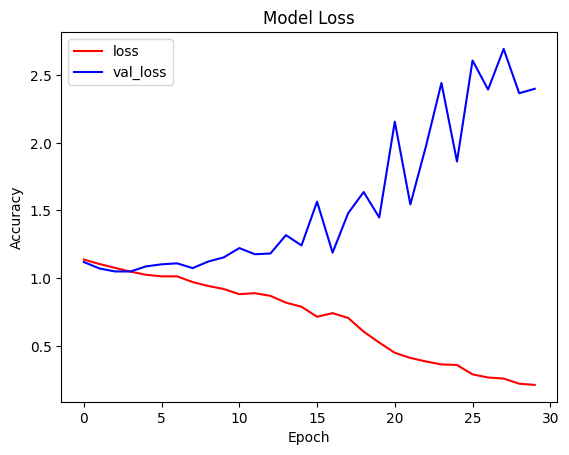

In [ ]:
#graph
plt.plot(history.history['loss'], color='red',label='loss')
plt.plot(history.history['val_loss'],color='blue',label='val_loss')
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
from keras import backend as K

def f1_score(y_true, y_pred):
    y_pred = K.argmax(y_pred, axis=-1)
    y_true = K.argmax(y_true, axis=-1)

    class_ids = K.arange(0, K.max(y_true) + 1, dtype='int32')
    true_positives = K.sum(K.cast(K.equal(y_true, y_pred), 'float32'), axis=0)
    false_positives = K.sum(K.cast(K.not_equal(y_true, y_pred) & K.equal(y_pred, class_ids[:, None]), 'float32'), axis=1)
    false_negatives = K.sum(K.cast(K.not_equal(y_true, y_pred) & K.equal(y_true, class_ids[:, None]), 'float32'), axis=1)

    precision = true_positives / (true_positives + false_positives + K.epsilon())
    recall = true_positives / (true_positives + false_negatives + K.epsilon())
    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())

    f1_score_mean = K.mean(f1)
    return f1_score_mean

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 claims_input (InputLayer)   [(None, 46, 768)]            0         []                            
                                                                                                  
 Conv1D_layer (Conv1D)       (None, 42, 256)              983296    ['claims_input[0][0]']        
                                                                                                  
 MaxPooling_layer (MaxPooli  (None, 21, 256)              0         ['Conv1D_layer[0][0]']        
 ng1D)                                                                                            
                                                                                                  
 bidirectional_15 (Bidirect  (None, 21, 200)              285600    ['MaxPooling_layer[0][0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - ETA: 0s - loss: 1.0992 - f1_score: 0.5446
Epoch 2: val_f1_score did not improve from 0.69767
7/7 [==============================] - 1s 82ms/step - loss: 1.0992 - f1_score: 0.5446 - val_loss: 1.0704 - val_f1_score: 0.6452
Epoch 3/30
7/7 [==============================] - ETA: 0s - loss: 1.0876 - f1_score: 0.5936
Epoch 3: val_f1_score improved from 0.69767 to 0.88742, saving model to /content/drive/MyDrive/UBC_project/f1_score_RoBERTa_model.h5
7/7 [==============================] - 1s 101ms/step - loss: 1.0876 - f1_score: 0.5936 - val_loss: 1.0738 - val_f1_score: 0.8874
Epoch 4/30
7/7 [==============================] - ETA: 0s - loss: 1.0544 - f1_score: 0.6278
Epoch 4: val_f1_score did not improve from 0.88742
7/7 [==============================] - 1s 81ms/step - loss: 1.0544 - f1_score: 0.6278 - val_loss: 1.0702 - val_f1_score: 0.6977
Epoch 5/30
7/7 [==============================] - ETA: 0s - loss: 1.0507 - f1_score: 0.5603
Epoch 5: val_f1_score d

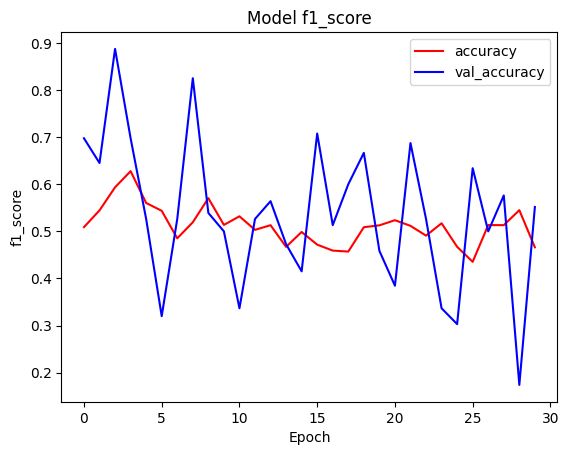

In [ ]:
from keras.layers import Input,Flatten, Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, BatchNormalization, GlobalMaxPooling1D, Attention
from keras.models import Model
from keras.optimizers import Nadam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf



# BERT output is feeded as input
input_layer = Input(shape=(max_squence_length,embedding_dim,), name='claims_input')

# Convolutional layer
conv_layer = Conv1D(filters=256, kernel_size=5, activation='relu', name='Conv1D_layer')(input_layer)
pooling_layer = MaxPooling1D(pool_size=2, name='MaxPooling_layer')(conv_layer)

# Bidirectional LSTM layer
bilstm_layer = Bidirectional(LSTM(100, return_sequences=True, name='BiLSTM_layer'))(pooling_layer)

# Attention mechanism
attention = Attention(name='Attention_layer')([bilstm_layer, bilstm_layer])
attention_pooling = GlobalMaxPooling1D(name='Attention_Pooling_layer')(attention)

# Dense layers
dense_layer = Dense(100, activation='relu', name='Dense_layer_1')(attention_pooling)
dropout_layer = Dropout(0.6, name='Dropout_layer_1')(dense_layer)
dense_layer_2 = Dense(50, activation='relu', name='Dense_layer_2')(dropout_layer)
dropout_layer_2 = Dropout(0.5, name='Dropout_layer_2')(dense_layer_2)

# Output layer for multi-class classification
output_layer = Dense(3, activation='softmax', name='output_layer')(dropout_layer_2)


#the model
model = Model(inputs=input_layer, outputs=output_layer)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=Nadam(learning_rate=0.001), loss=loss, metrics=[f1_score])

#model summary
model.summary()

checkpoint_callback = ModelCheckpoint('/content/drive/MyDrive/UBC_project/f1_score_RoBERTa_model.h5', monitor='val_f1_score', save_best_only=True, mode='max', verbose=1)


#training parameters
batch_size = 100
epochs = 30

history = model.fit(
    x_train,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.12,
    callbacks=[checkpoint_callback]
)

#graph
plt.plot(history.history['f1_score'], color='red',label='accuracy')
plt.plot(history.history['val_f1_score'],color='blue',label='val_accuracy')
plt.title('Model f1_score')
plt.ylabel('f1_score')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
import re
import numpy as np

def remove_link(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    if pattern:
        return pattern.sub(r'', text)
    else:
        return text

import string
Exclude=string.punctuation



def remove_punctuation(text):
    return text.translate(str.maketrans('','',Exclude))

def remove_html_tag(text):
    i=0
    pattern=re.compile(r'<.*?>')
    if pattern:
      list=np.array(pattern.findall(text))
      n=list.shape[0]
    for i in range(n):
      text= text.replace(list[i],'')
    return text


from textblob import TextBlob

def correct_spell(text):
    textblb=TextBlob(text)
    return textblb.correct().string


import nltk

from nltk.corpus import stopwords

nltk.download('stopwords')


extra=stopwords.words('english')
stopwrd=np.array(extra)

def remove_stopwords(text, stopwords):
    split_text = text.split()
    filtered_text = []

    for word in split_text:
        if word not in stopwords:
            filtered_text.append(word)

    result = ' '.join(filtered_text)
    return result

def remove_emoji(text):
    pattern=re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    if pattern:
       list= pattern.findall(text)
    return pattern.sub(r'', text)

import spacy
nlp = spacy.load("en_core_web_sm")

def lemmatization(text):
    doc=nlp(text)
    text_=[]
    for word in doc:
       text_.append(word.lemma_)

    result = ' '.join(text_)
    return result

def text_cleaning(text,stopwords):
    text=text.lower()
    text=remove_link(text)
    text=remove_html_tag(text)
    text=remove_emoji(text)
    text=remove_stopwords(text,stopwords)
    text=remove_punctuation(text)
    text=lemmatization(text)
    text=correct_spell(text)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
text_cleaning('Climate change is a natural process and not influenced by human activities',stopwrd)

'climate change natural process influence human activity'

In [ ]:
from keras.utils import custom_object_scope
class InferenceModel:
    def __init__(self, model_path='/content/drive/MyDrive/UBC_project/RoBERTa_model.h5'):
        self.model_path = model_path
        self.model = self.load_model()

    def load_model(self):
        return tf.keras.models.load_model(self.model_path)


    def predict(self, input_data):
        input_data = text_cleaning(input_data,stopwrd)
        list=[]
        list.append(input_data)
        input_data=model_prediction_input(list,max_squence_length,RoBERTa_model)
        predictions = self.model.predict(input_data)
        return predictions



SyntaxError: invalid syntax (<ipython-input-5-709d50d91e94>, line 2)

In [ ]:
inference_model = InferenceModel()
def generate_output(text):
    output = inference_model.predict(text)
    return output


NameError: name 'tf' is not defined

1/1 [==============================] - 1s 1s/step


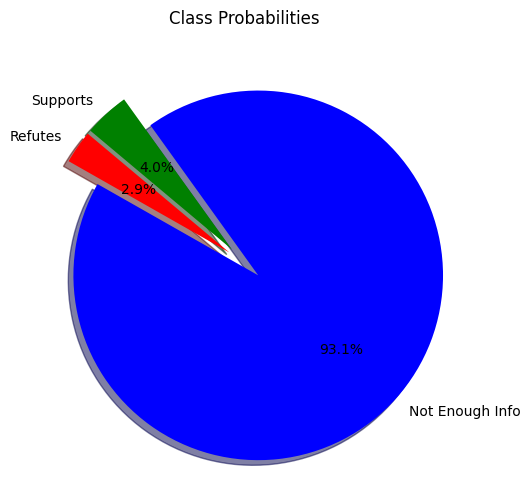

In [ ]:
# Generate probabilities for the given text
probabilities = generate_output('Climate change is a natural process and not influenced by human activities')

# Extract probabilities for each class
class_0_prob = probabilities[0, 0]
class_1_prob = probabilities[0, 1]
class_2_prob = probabilities[0, 2]

# Define the class labels
classes = ['Refutes', 'Not Enough Info', 'Supports']

# Define the probabilities
values = [class_0_prob, class_1_prob, class_2_prob]

# Define colors for the pie chart
colors = ['red','blue','green']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=classes, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True, explode=(0.1, 0.1, 0.1))

# Adding a title
plt.title('Class Probabilities')

# Display the pie chart
plt.show()


In [ ]:
!pip install pyngrok
!pip install flask-ngrok

In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token('2ivm4jUl8KHrTf8Qp4Xzep5zdhv_7d5d3ufxUYxYztNcMrBwW')
public_url = ngrok.connect(5000).public_url
print(public_url)


from flask import Flask, render_template, request, jsonify, render_template_string
from flask_ngrok import run_with_ngrok
import numpy as np

app = Flask(__name__)
run_with_ngrok(app)

@app.route("/")
def index():
    return render_template_string('''
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Climate Change Misinformation Checker</title>
        <style>
            body {
                font-family: Arial, sans-serif;
                background: url('https://cdn.prod.website-files.com/656a6f5ca4824808211181c5/65a7ef109c30ede6f2c52e51_240111-Climate-change-Blog-2.jpg') no-repeat center center fixed;
                background-size: cover;
                margin: 0;
                display: flex;
                flex-direction: column;
                align-items: center;
                justify-content: center;
                min-height: 100vh;
                color: white;
            }

            .container {
                background-color: rgba(0, 0, 25, 0.7);
                padding: 20px;
                border-radius: 10px;
                box-shadow: 0 0 10px rgba(0, 0, 0, 0.5);
                width: 90%;
                max-width: 800px;
                text-align: center;
                color: #333;
            }

            h1 {
                color: #fff;
            }

            p {
                color: #fff;
            }

            textarea {
                width: 100%;
                height: 40px;
                padding: 10px;
                border: 1px solid #ddd;
                border-radius: 5px;
                margin-bottom: 20px;
                font-size: 16px;
            }

            button {
                background-color: #007BFF;
                color: white;
                padding: 10px 20px;
                border: none;
                border-radius: 5px;
                cursor: pointer;
                font-size: 16px;
            }

            button:hover {
                background-color: #49FF33;
            }

            #result {
                margin-top: 20px;
                font-size: 18px;
            }

            .media {
                display: flex;
                flex-direction: column;
                align-items: center;
                margin-top: 20px;
            }

            .media img {
                max-width: 100%;
                border-radius: 10px;
                margin-bottom: 20px;
            }

            .media video {
                max-width: 100%;
                border-radius: 10px;
                margin-bottom: 20px;
            }
            .chart-container {
                width: 50%;
                height: 200px;
                margin-top: 20px;
                align-items: center;
                text-align: center;
                display: flex;
                justify-content: center;
                border-radius: 10px;
                box-shadow: 1 0 10px rgba(0, 0, 0, 0.5);
            }
        </style>
        <script src="https://cdn.jsdelivr.net/npm/chart.js"></script>
    </head>
    <body>
        <div class="container">
            <h1>Climate Change Misinformation Checker</h1>
            <p>Enter the news content below to check if it contains misinformation.</p>
            <form id="newsForm">
                <textarea id="newsInput" name="newsInput" placeholder="Enter news content here..."></textarea>
                <button type="submit">Check Misinformation</button>
            </form>

            <div class="media">
                <h2 style="color : white ">RESULT</h2>
                <p id="resultText"></p>
                <div class="chart-container">
                <canvas id="pieChart" width="20" height="20"></canvas>
                </div>
                <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFxxei1iazWGrGNEJ-IttgK7krnibcK5irYA&s" alt="Climate Change">
                <iframe src="https://www.youtube.com/embed/EuwMB1Dal-4" allowfullscreen></iframe>
            </div>
        </div>
        <script>
    document.getElementById('newsForm').addEventListener('submit', function(event) {
        event.preventDefault();
        const newsInput = document.getElementById('newsInput').value;

        fetch('/result', {
            method: 'POST',
            headers: {
                'Content-Type': 'application/json',
            },
            body: JSON.stringify({ newsInput: newsInput }),
        })
        .then(response => response.json())
        .then(data => {
            const resultText = document.getElementById('resultText');
            const ctx = document.getElementById('pieChart').getContext('2d');

            if (data.error) {
                resultText.textContent = data.error;
            } else {
                resultText.textContent = data.result;

                // Destroy previous chart instance if it exists
                if (window.myPieChart) {
                    window.myPieChart.destroy();
                }

                // Create new chart instance
                window.myPieChart = new Chart(ctx, {
                    type: 'pie',
                    data: {
                        labels: ['Refutes', 'Not Enough Info', 'Supports'],
                        datasets: [{
                            label: 'Probability',
                            data: data.probabilities,
                            backgroundColor: ['red', 'blue', 'green'],
                            borderWidth: 1
                        }]
                    },
                    options: {
                        responsive: true,
                        cutout: 20,
                        plugins: {
                            legend: {
                                position: 'top',
                            },
                            tooltip: {
                                callbacks: {
                                    label: function(tooltipItem) {
                                        return tooltipItem.label + ': ' + tooltipItem.raw.toFixed(2) + '%';
                                    }
                                }
                            }
                        },
                        layout: {
                            padding: {
                                top: 10,
                                right: 10,
                                bottom: 10,
                                left: 10
                            }
                        },
                        animation: {
                            animateScale: true,
                            animateRotate: true
                        }
                    }
                });
            }
        })
        .catch((error) => {
            console.error('Error:', error);
        });
    });
</script>

    </body>
    </html>
    ''')

@app.route('/result', methods=['POST'])
def result():
    try:
        data = request.get_json()
        news_content = data['newsInput']
        probabilities = inference_model.predict(news_content)
        class_0_prob = float(probabilities[0, 0])
        class_1_prob = float(probabilities[0, 1])
        class_2_prob = float(probabilities[0, 2])

        result_text = f"Refutes: {class_0_prob*100:.2f}%,  Not Enough Info: {class_1_prob*100:.2f}%,  Supports: {class_2_prob*100:.2f}%"
        return jsonify(result=result_text, probabilities=[class_0_prob*100, class_1_prob*100, class_2_prob*100])

    except Exception as e:
        return jsonify(error=str(e))

if __name__ == '__main__':
    app.run()


https://5f20-34-142-151-38.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://5f20-34-142-151-38.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [08/Jul/2024 21:36:18] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [08/Jul/2024 21:36:22] "GET /favicon.ico HTTP/1.1" 404 -


1/1 [==============================] - 2s 2s/step


INFO:werkzeug:127.0.0.1 - - [08/Jul/2024 21:36:47] "POST /result HTTP/1.1" 200 -


1/1 [==============================] - 0s 19ms/step


INFO:werkzeug:127.0.0.1 - - [08/Jul/2024 21:36:48] "POST /result HTTP/1.1" 200 -


1/1 [==============================] - 0s 18ms/step


INFO:werkzeug:127.0.0.1 - - [08/Jul/2024 21:37:09] "POST /result HTTP/1.1" 200 -


1/1 [==============================] - 0s 19ms/step


INFO:werkzeug:127.0.0.1 - - [08/Jul/2024 21:37:32] "POST /result HTTP/1.1" 200 -


1/1 [==============================] - 0s 19ms/step


INFO:werkzeug:127.0.0.1 - - [08/Jul/2024 21:38:08] "POST /result HTTP/1.1" 200 -


1/1 [==============================] - 0s 20ms/step


INFO:werkzeug:127.0.0.1 - - [08/Jul/2024 21:38:36] "POST /result HTTP/1.1" 200 -


1/1 [==============================] - 0s 27ms/step


INFO:werkzeug:127.0.0.1 - - [08/Jul/2024 21:39:59] "POST /result HTTP/1.1" 200 -


1/1 [==============================] - 0s 19ms/step


INFO:werkzeug:127.0.0.1 - - [08/Jul/2024 21:40:14] "POST /result HTTP/1.1" 200 -


1/1 [==============================] - 0s 19ms/step


INFO:werkzeug:127.0.0.1 - - [08/Jul/2024 21:40:27] "POST /result HTTP/1.1" 200 -


1/1 [==============================] - 0s 20ms/step


INFO:werkzeug:127.0.0.1 - - [08/Jul/2024 21:40:35] "POST /result HTTP/1.1" 200 -


1/1 [==============================] - 0s 20ms/step


INFO:werkzeug:127.0.0.1 - - [08/Jul/2024 21:41:00] "POST /result HTTP/1.1" 200 -


1/1 [==============================] - 0s 28ms/step


INFO:werkzeug:127.0.0.1 - - [08/Jul/2024 21:41:16] "POST /result HTTP/1.1" 200 -


#Roberta with adapter layer

In [ ]:
!pip install transformers adapter-transformers

In [ ]:
from transformers import RobertaModel, RobertaTokenizer
from transformers.adapters import AdapterConfig


# Load the pre-trained RoBERTa model and tokenizer
model = RobertaModel.from_pretrained("roberta-base")
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

# Define the adapter configuration
adapter_config = AdapterConfig.load("pfeiffer")

# Add an adapter to the model
model.add_adapter("my_adapter", config=adapter_config)

# Train the adapter if necessary
model.train_adapter("my_adapter")

# Activate the adapter
model.set_active_adapters("my_adapter")

# Example text to encode
text = "This is a sample sentence."

# Tokenize the text
inputs = tokenizer(text, return_tensors="pt")

# Get the encoded representation from the model
outputs = model(**inputs)

# The last hidden state is typically used as the encoded representation
encoded_representation = outputs.last_hidden_state

print(encoded_representation)


ModuleNotFoundError: No module named 'transformers.adapters'